In [1023]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.decomposition import PCA


In [1024]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [1025]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [1026]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns = ["price_change_percentage_24h", "price_change_percentage_7d",\
            "price_change_percentage_14d","price_change_percentage_30d",\
            "price_change_percentage_60d","price_change_percentage_200d",\
            "price_change_percentage_1y"]
scaled_data = StandardScaler().fit_transform(market_data_df[columns])

In [1027]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(scaled_data,columns=columns)
# Copy the crypto names from the original data
market_data_scaled_df['crypto_names'] = market_data_df.index
# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index('crypto_names')
# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [1028]:
 # Use a range from 1 to 11
k_values = list(range(1,11))
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
def calculate_elbow_curve(data_frame, k_values):
   
    # Create an empty list to store the inertia values
    inertia = []
    
    # Loop through each k value and calculate inertia
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(data_frame)
        inertia.append(kmeans.inertia_)
    
    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {
        'k': k_values,
        'inertia': inertia
    }
    
    return elbow_data
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(calculate_elbow_curve(market_data_scaled_df, k_values))
# Display the DataFrame

elbow_df


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [1029]:
def showElbowCurvePlot(elbow_df):
    plt.figure(figsize=(8, 6))
    plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

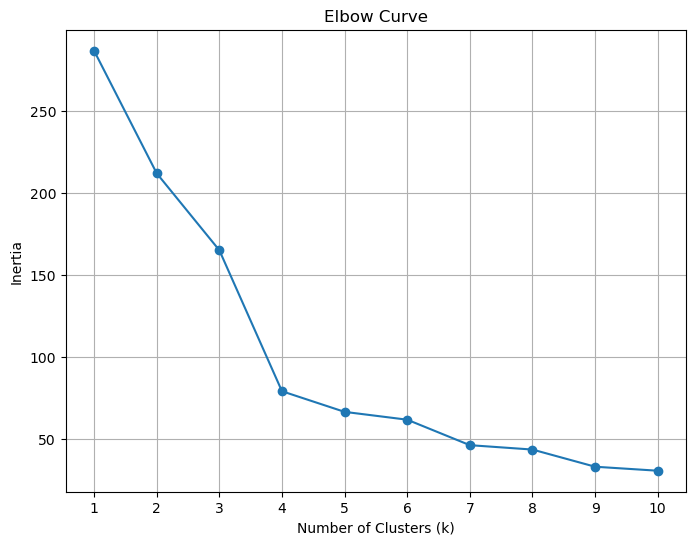

In [1030]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
showElbowCurvePlot(elbow_df)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 This is where the plot starts flattening out.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [1031]:
# Initialize the K-Means model using the best value for k
best_k =4
kmeans = KMeans(n_clusters= best_k, random_state=1)

In [1032]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [1033]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(market_data_scaled_df)

# View the resulting array of cluster values.
predicted_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [1034]:
# Create a copy of the DataFrame
clustered_df = market_data_scaled_df.copy()

In [1035]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_df['crypto_cluster'] = predicted_clusters
# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Figure size 1000x800 with 0 Axes>

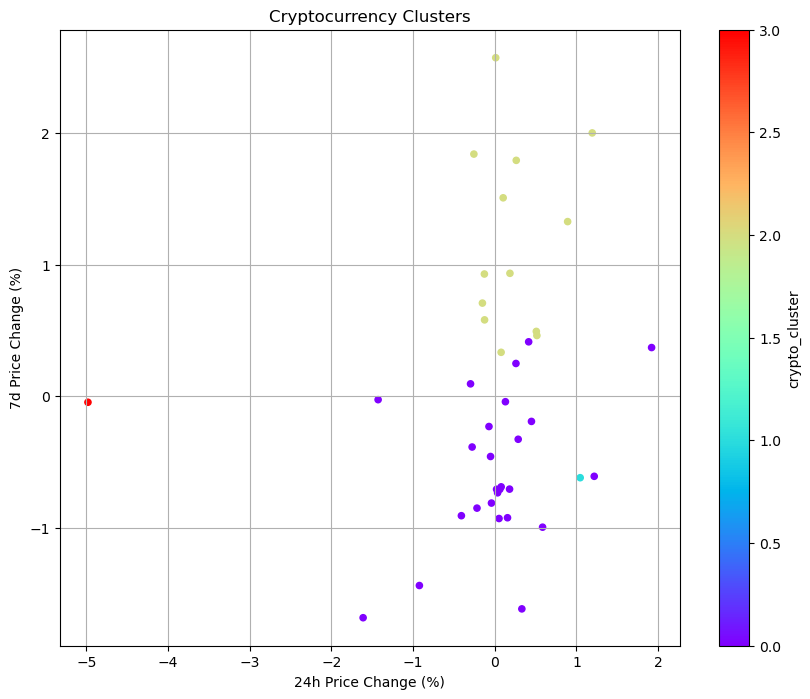

In [1036]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 8))
scatter_plot = market_data_scaled_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap='rainbow',
    figsize=(10, 8),
    title='Cryptocurrency Clusters'
)
plt.xlabel('24h Price Change (%)')
plt.ylabel('7d Price Change (%)')
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [1037]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [1038]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
pca_transformed_data[0:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [1039]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio[0:3]

array([0.34871677, 0.31363391, 0.22627118])

In [1040]:
total_explained_variance = explained_variance_ratio.sum()
print(total_explained_variance)

0.8886218549859445


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8867743104975923

In [1041]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_transformed_data, columns=['PCA1', 'PCA2', 'PCA3'])
# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_scaled_df.index

# Set the coinid column as index
pca_df = pca_df.set_index('coin_id')

# Display sample data
pca_df.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321
binancecoin,0.822871,-1.682096,-0.905203
chainlink,0.913868,-1.128684,-2.730038
cardano,0.811102,-1.113378,-1.598655
litecoin,0.258728,-0.946884,-1.103560


### Find the Best Value for k Using the PCA Data

In [1042]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(calculate_elbow_curve(pca_df,k_values))
# Display the DataFrame
elbow_df_pca

,k,inertia
0,1,290.622694
1,2,207.307439
2,3,123.126951
3,4,44.130602
4,5,33.217427
5,6,23.374713
6,7,20.943077
7,8,18.666961
8,9,13.640110
9,10,10.287149


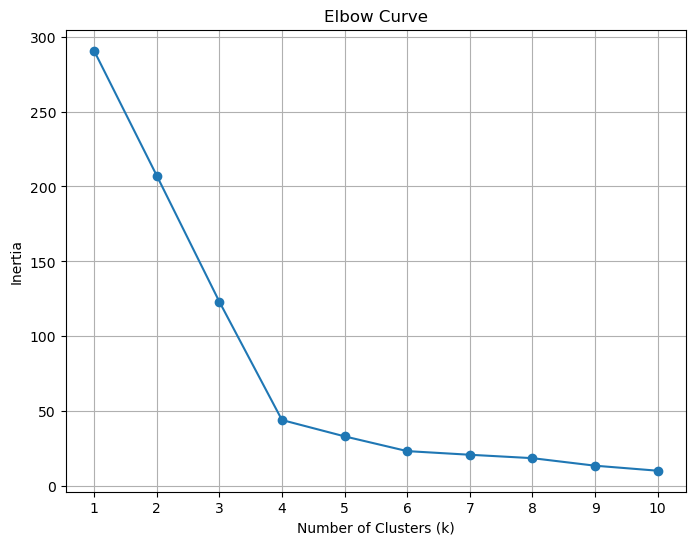

In [1043]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
showElbowCurvePlot(elbow_df_pca)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  also 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  for me 4 is the best for both

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [1044]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters= 4, random_state=1)

In [1045]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [1046]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_pca.predict(pca_df)
# Print the resulting array of cluster values.
predicted_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [1047]:
# Create a copy of the DataFrame with the PCA data
pca_copy_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_copy_df['crypto_cluster'] = predicted_clusters_pca

# Display sample data
pca_copy_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1


In [1048]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_copy_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='crypto_cluster',
    colormap='winter',
    title='Cryptocurrency Clusters (PCA Transformed Data)',
    size=100,
    alpha=0.6,
   hover_cols=['crypto_name']
)
scatter_plot


:NdOverlay   [crypto_cluster]
   :Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [1049]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    